##### 影像的馬賽克效果
這篇教學會使用 OpenCV 裡改變尺寸的功能，實現影像的馬賽克效果，接著再透過剪裁影像的方式，做出將影像中特定區域加上馬賽克的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 馬賽克效果 
在瀏覽圖片時，如果將小張的圖片不斷放大，就會看見圖片的像素變大，成為一格格的馬賽克，運用同樣的原理，\
只要對圖片使用「兩次 resize()」的方式，就能快速實現馬賽克的效果。

下方的程式一開始運用 img.shape 取得圖片尺寸，接著使用 cv2.resize() 方法 ( interpolation=cv2.INTER_LINEAR ) 進行縮小，\
接著再度使用 cv2.resize() 方法搭配 ( interpolation=cv2.INTER_NEAREST ) 進行放大，就會出現馬賽克效果。

* 參考：[取得影像資訊](https://steam.oxxostudio.tw/category/python/ai/opencv-information.html)、[reize() 改變尺寸](https://steam.oxxostudio.tw/category/python/ai/opencv-resize.html#a3)

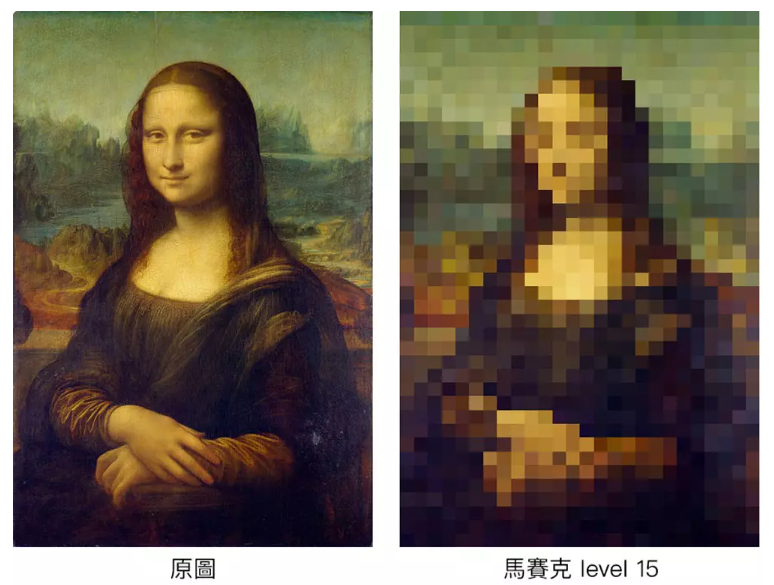

In [1]:
import cv2
img = cv2.imread('view_1.jpg')
size = img.shape         # 取得原始圖片的資訊
level = 15               # 縮小比例 ( 可當作馬賽克的等級 )
h = int(size[0]/level)   # 按照比例縮小後的高度 ( 使用 int 去除小數點 )
w = int(size[1]/level)   # 按照比例縮小後的寬度 ( 使用 int 去除小數點 )
mosaic = cv2.resize(img, (w,h), interpolation=cv2.INTER_LINEAR)   # 根據縮小尺寸縮小
mosaic = cv2.resize(mosaic, (size[1],size[0]), interpolation=cv2.INTER_NEAREST) # 放大到原本的大小
cv2.imshow('oxxostudio', mosaic)
cv2.waitKey(0)           # 按下任意鍵停止
cv2.destroyAllWindows()

##### 特定區域馬賽克 
延伸上方的程式碼，搭配「[剪裁影像](https://steam.oxxostudio.tw/category/python/ai/opencv-crop.html)」文章的範例，就能將影像中特定的區域馬賽克，下方的範例會將蒙娜麗莎的臉加上馬賽克。

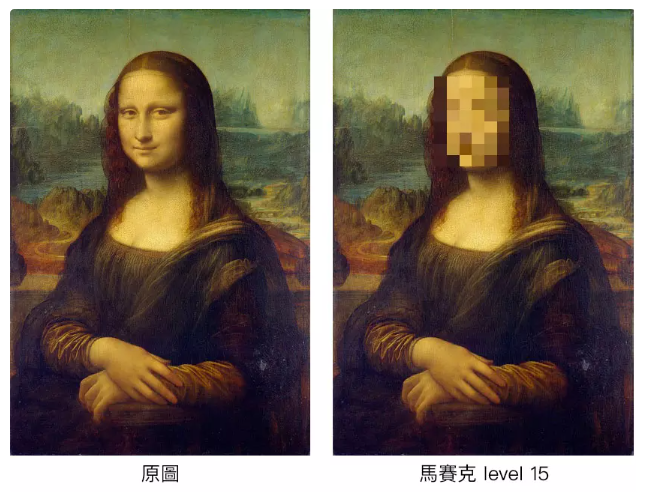

In [7]:
import cv2
img = cv2.imread('meme_1.jpg')

x = 50   # 剪裁區域左上 x 座標
y = 50    # 剪裁區域左上 y 座標
cw = 105  # 剪裁區域寬度
ch = 105  # 剪裁區域高度
mosaic = img[y:y+ch, x:x+cw]   # 取得剪裁區域
level = 15         # 馬賽克程度
h = int(ch/level)  # 縮小的高度 ( 使用 int 去除小數點 )
w = int(cw/level)  # 縮小的寬度 ( 使用 int 去除小數點 )
mosaic = cv2.resize(mosaic, (w,h), interpolation=cv2.INTER_LINEAR)
mosaic = cv2.resize(mosaic, (cw,ch), interpolation=cv2.INTER_NEAREST)
img[y:y+ch, x:x+cw] = mosaic   # 將圖片的剪裁區域，換成馬賽克的圖
cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cv2.destroyAllWindows()